In [55]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import make_pipeline

In [35]:
url = 'https://raw.githubusercontent.com/digipodium/Datasets/main/classfication/blood_transfusion.csv'
df = pd.read_csv(url)
df.head()

,Recency,Frequency,Monetary,Time,Class
0,2,50,12500,98,donated
1,0,13,3250,28,donated
2,1,16,4000,35,donated
3,2,20,5000,45,donated
4,1,24,6000,77,not donated


<AxesSubplot:>

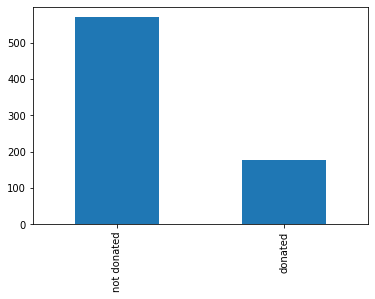

In [36]:
df.Class.value_counts().plot(kind='bar')

In [37]:
X = df.drop(columns=['Class'])
y = df.Class

In [38]:
yEnc = LabelEncoder()
y = yEnc.fit_transform(y)

In [39]:
estimator = make_pipeline(StandardScaler(),DecisionTreeClassifier())

In [40]:
estimator.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('decisiontreeclassifier', DecisionTreeClassifier())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'decisiontreeclassifier': DecisionTreeClassifier(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'decisiontreeclassifier__ccp_alpha': 0.0,
 'decisiontreeclassifier__class_weight': None,
 'decisiontreeclassifier__criterion': 'gini',
 'decisiontreeclassifier__max_depth': None,
 'decisiontreeclassifier__max_features': None,
 'decisiontreeclassifier__max_leaf_nodes': None,
 'decisiontreeclassifier__min_impurity_decrease': 0.0,
 'decisiontreeclassifier__min_samples_leaf': 1,
 'decisiontreeclassifier__min_samples_split': 2,
 'decisiontreeclassifier__min_weight_fraction_leaf': 0.0,
 'decisiontreeclassifier__random_state': None,
 'decisiontreeclassifier__splitter': 'best'}

In [44]:
params = {
    'decisiontreeclassifier__criterion':['gini','entropy','log_loss'],
    'decisiontreeclassifier__splitter': ['best','random'],
    'decisiontreeclassifier__max_depth':[5,10,15,20,25,30],
    'decisiontreeclassifier__min_samples_split':[2,3,4,5]
}

In [45]:
grid = GridSearchCV(estimator, params, cv=3, n_jobs=-1, verbose=3)
grid.fit(X,y)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy',
                                                               'log_loss'],
                         'decisiontreeclassifier__max_depth': [5, 10, 15, 20,
                                                               25, 30],
                         'decisiontreeclassifier__min_samples_split': [2, 3, 4,
                                                                       5],
                         'decisiontreeclassifier__splitter': ['best',
                                                              'random']},
             verbose=3)

In [46]:
grid.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=5, min_samples_split=4,
                                        splitter='random'))])

In [47]:
out = pd.DataFrame(grid.cv_results_)

In [49]:
out.sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_decisiontreeclassifier__criterion,param_decisiontreeclassifier__max_depth,param_decisiontreeclassifier__min_samples_split,param_decisiontreeclassifier__splitter,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
5,0.004335,4.703029e-04,0.001667,4.719324e-04,gini,5,4,random,"{'decisiontreeclassifier__criterion': 'gini', ...",0.784,0.763052,0.767068,0.771373,0.009078,1
1,0.006001,8.167296e-04,0.002001,7.018853e-07,gini,5,2,random,"{'decisiontreeclassifier__criterion': 'gini', ...",0.776,0.771084,0.759036,0.768707,0.007127,2
55,0.004668,4.710895e-04,0.002000,3.893359e-07,entropy,5,5,random,{'decisiontreeclassifier__criterion': 'entropy...,0.756,0.771084,0.775100,0.767395,0.008223,3
103,0.004334,4.713705e-04,0.002000,4.899036e-07,log_loss,5,5,random,{'decisiontreeclassifier__criterion': 'log_los...,0.780,0.763052,0.755020,0.766024,0.010412,4
99,0.008669,7.319840e-03,0.002000,3.893359e-07,log_loss,5,3,random,{'decisiontreeclassifier__criterion': 'log_los...,0.736,0.767068,0.763052,0.755373,0.013797,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,0.004002,6.836514e-07,0.001000,2.247832e-07,gini,30,3,random,"{'decisiontreeclassifier__criterion': 'gini', ...",0.564,0.714859,0.674699,0.651186,0.063793,140
18,0.004668,4.711496e-04,0.002000,1.072147e-06,gini,15,3,best,"{'decisiontreeclassifier__criterion': 'gini', ...",0.544,0.694779,0.698795,0.645858,0.072043,141
139,0.005001,8.165348e-04,0.001666,4.707523e-04,log_loss,30,3,random,{'decisiontreeclassifier__criterion': 'log_los...,0.496,0.738956,0.694779,0.643245,0.105668,142
125,0.005002,1.946680e-07,0.002668,4.704713e-04,log_loss,20,4,random,{'decisiontreeclassifier__criterion': 'log_los...,0.504,0.718876,0.670683,0.631186,0.092061,143


In [50]:
model = grid.best_estimator_

In [53]:
ypred = model.predict(X)
print(confusion_matrix(y, ypred))

[[ 89  89]
 [ 72 498]]


In [54]:
print(classification_report(y, ypred))

              precision    recall  f1-score   support

           0       0.55      0.50      0.53       178
           1       0.85      0.87      0.86       570

    accuracy                           0.78       748
   macro avg       0.70      0.69      0.69       748
weighted avg       0.78      0.78      0.78       748



In [56]:
KNeighborsClassifier?

Init signature:
KNeighborsClassifier(
    n_neighbors=5,
    *,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,
)
Docstring:     
Classifier implementing the k-nearest neighbors vote.

Read more in the :ref:`User Guide <classification>`.

Parameters
----------
n_neighbors : int, default=5
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : {'uniform', 'distance'} or callable, default='uniform'
    Weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.
    - [callable] : a user-defined function which accepts an
      array of distances, and returns an array of the same shape
     

In [58]:
import plotly.express as px

px.scatter_3d(df, x='Recency', y='Frequency', z='Monetary', color='Class')